In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


Pandas should be able to read this without prefixing it with 'content', if not try "df = pd.read_csv('content/drive/MyDrive...')


---


An issue is not being able to read the data as is. encoding='ISO-8859-1' is required to convert it to UTF-8.

In [ ]:
df = pd.read_csv('drive/MyDrive/CAP4770 - Group 7/Steam-Game-Data.csv',encoding='ISO-8859-1')

In [ ]:
df['Net Revenue'] = df['Net Revenue'].astype(str).str.replace(',', '') # convert the 'object' datatype to a string and replace commas
df['Net Revenue'] = pd.to_numeric(df['Net Revenue']) # convert the revenue strings to values
df = df.dropna(subset=['Net Revenue']) # get rid of rows with null revenue values
df.head()

,#,Title,Release,Price,Tags,Publishers,Developers,Followers,Reviews,Score,Net Revenue
0,1,Grand Theft Auto V Legacy,"Apr 14, 2015",29.99,"Action, Adventure, Atmospheric, Automobile Sim...",Rockstar Games,Rockstar North,3384745.0,1825534,9,1.000000e+09
1,2,Black Myth: Wukong,"Aug 19, 2024",59.99,"3D, Action, Action RPG, Action-Adventure, Adve...",Game Science,Game Science,1370722.0,838856,10,9.600000e+08
2,3,ELDEN RING,"Feb 24, 2022",59.99,"3D, Action, Action RPG, Atmospheric, Character...","Bandai Namco Entertainment, FromSoftware, Inc.","FromSoftware, Inc.",1085962.0,770087,9,8.900000e+08
3,4,Cyberpunk 2077,"Dec 9, 2020",59.99,"Action, Action RPG, Adventure, Atmospheric, Ch...",CD PROJEKT RED,CD PROJEKT RED,1492746.0,753788,9,8.700000e+08
4,5,Red Dead Redemption 2,"Dec 5, 2019",59.99,"Action, Adventure, Atmospheric, Beautiful, FPS...",Rockstar Games,Rockstar Games,876870.0,685893,9,7.900000e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81539 entries, 0 to 81538
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #            81539 non-null  int64  
 1   Title        81500 non-null  object 
 2   Release      81470 non-null  object 
 3   Price        81539 non-null  float64
 4   Tags         81534 non-null  object 
 5   Publishers   81326 non-null  object 
 6   Developers   81466 non-null  object 
 7   Followers    80105 non-null  float64
 8   Reviews      81539 non-null  int64  
 9   Score        81539 non-null  int64  
 10  Net Revenue  81539 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 6.8+ MB


In [ ]:
df.describe()

,#,Price,Followers,Reviews,Score,Net Revenue
count,81539.00000,81539.000000,8.010500e+04,8.153900e+04,81539.000000,8.153900e+04
mean,36914.19051,9.475550,3.912187e+03,1.124184e+03,4.666405,5.800622e+05
std,18809.84631,15.582815,4.139094e+04,1.602593e+04,3.799003,1.079672e+07
min,1.00000,0.500000,1.000000e+00,1.000000e+00,0.000000,1.700000e+01
25%,20385.50000,2.990000,4.200000e+01,4.000000e+00,0.000000,3.400000e+02
50%,40770.00000,5.990000,1.470000e+02,1.700000e+01,6.000000,1.700000e+03
75%,56280.00000,10.990000,7.800000e+02,8.700000e+01,8.000000,1.300000e+04
max,59320.00000,999.980000,8.227351e+06,1.825534e+06,10.000000,1.000000e+09


In [ ]:
y = df['Net Revenue']
y.head()

,Net Revenue
0,1.000000e+09
1,9.600000e+08
2,8.900000e+08
3,8.700000e+08
4,7.900000e+08


In [ ]:
df2 = df[['#', 'Price', 'Followers', 'Reviews', 'Score', 'Net Revenue']]
# df2['Reviews/Followers'] = df.apply(lambda row: (row['Reviews'] / row['Followers']), axis=1)
df2.corr()

,#,Price,Followers,Reviews,Score,Net Revenue
#,1.000000,-0.389003,-0.167554,-0.131277,-0.745491,-0.103337
Price,-0.389003,1.000000,0.103961,0.078726,0.155226,0.099772
Followers,-0.167554,0.103961,1.000000,0.687251,0.092923,0.592289
Reviews,-0.131277,0.078726,0.687251,1.000000,0.078104,0.856847
Score,-0.745491,0.155226,0.092923,0.078104,1.000000,0.057854
Net Revenue,-0.103337,0.099772,0.592289,0.856847,0.057854,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df2[["Reviews"]]
y = df2[["Net Revenue"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

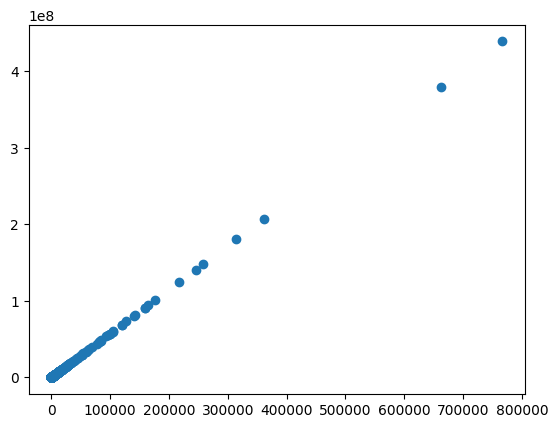

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_test, y_pred, "o")

In [ ]:
x2 = df2[["Score"]]

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y, train_size=0.9)

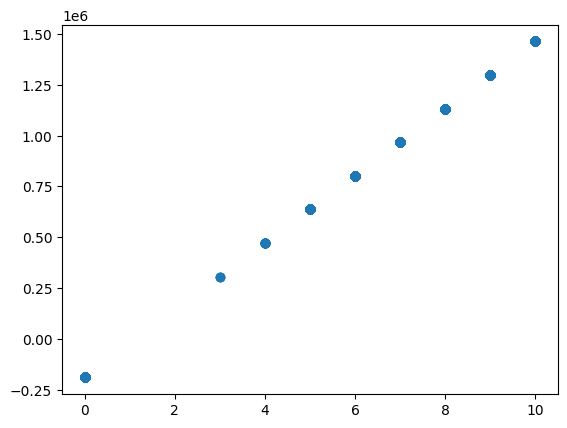

In [ ]:
lm2 = LinearRegression()
lm2.fit(x_train2, y_train2)

y_pred2 = lm2.predict(x_test2)
plt.plot(x_test2, y_pred2, "o")

In [ ]:
# this is the standardized/normalized values for the predictors/features we want to look at for linear/multiple/lasso regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

new_features = df[['Followers', 'Reviews', 'Score']]
scaled_features = scaler.fit_transform(new_features)